# Bike Sharing Data EDA

In [32]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm

## Goals

- whether the distributions of **bike hires** (in spring and summer) follows a **normal distribution**

- whether the distributions of **bike usage** differs in **spring and summer**

## Import Data

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

### **Files**:

- **`hour.csv`** : bike sharing counts aggregated on hourly basis. Records: 17379 hours
- **`day.csv`** : bike sharing counts aggregated on daily basis. Records: 731 days

### **Citation**:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

### **Attributes**:

<div>
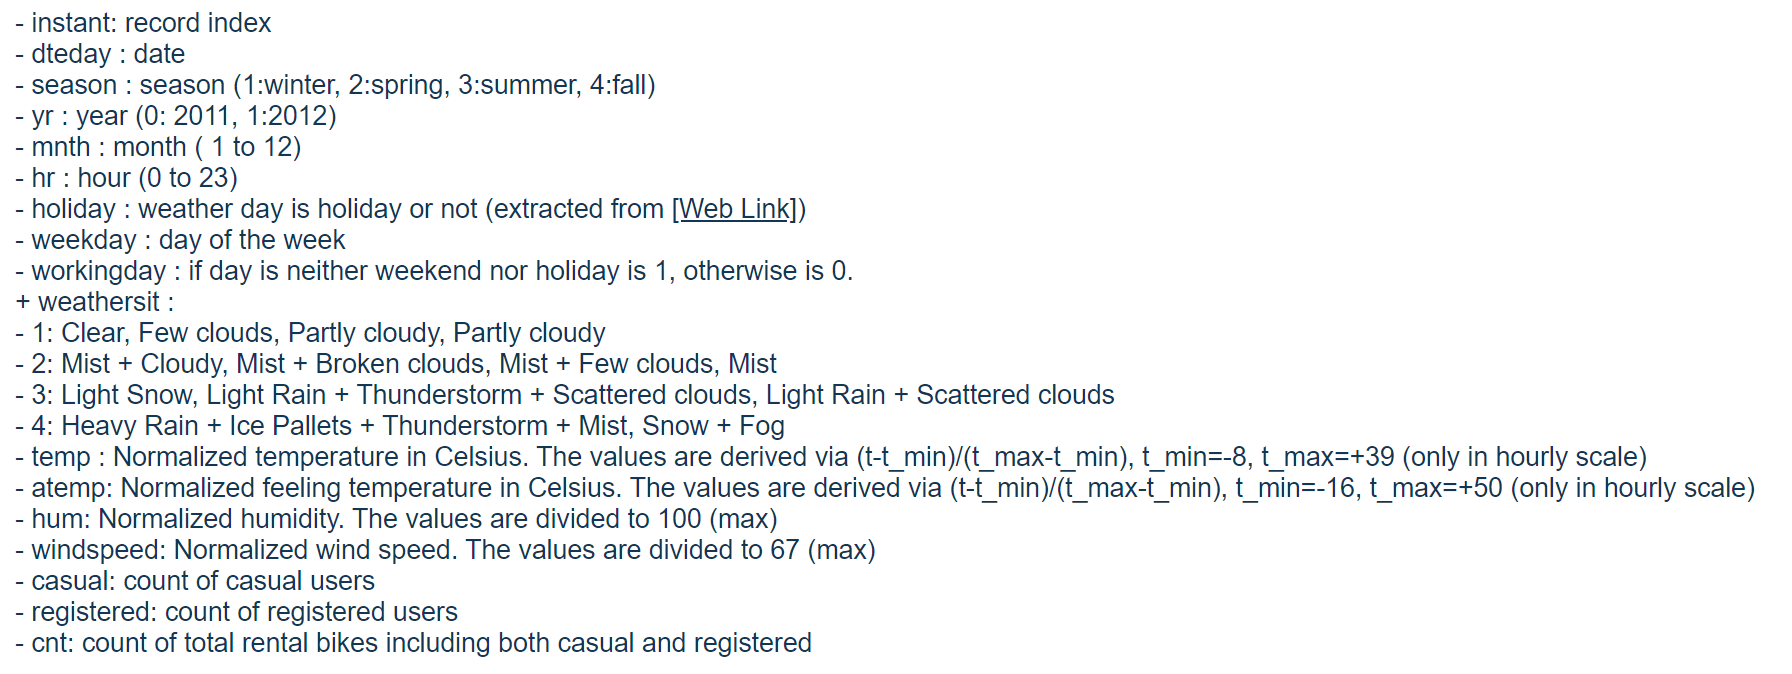
</div>

In [33]:
df_hour = pd.read_csv('hour.csv')
df_day = pd.read_csv('day.csv')

In [34]:
print(f'There are {len(df_hour)} entries and {len(df_hour.columns)} attributes in the hour.csv file.')
print(f'There are {len(df_day)} entries and {len(df_day.columns)} attributes in the day.csv file.')

There are 17379 entries and 17 attributes in the hour.csv file.
There are 731 entries and 16 attributes in the day.csv file.


In [35]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [36]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Data Overview

In [7]:
print(f'There are {df_hour.isnull().sum().sum()} missing values in the hour.csv file')
print(f'There are {df_day.isnull().sum().sum()} missing values in the day.csv file')
print()
print(f"There are {df_hour['cnt'].duplicated().sum()} duplicated values in the hour.csv file")
print(f"There are {df_day['cnt'].duplicated().sum()} duplicated values in the day.csv file")

There are 0 missing values in the hour.csv file
There are 0 missing values in the day.csv file

There are 16510 duplicated values in the hour.csv file
There are 35 duplicated values in the day.csv file


In [11]:
len(df_hour['cnt'].unique())

869

In [31]:
len(df_hour['cnt'][df_hour['cnt'].duplicated()].unique())

771

In [66]:
evening_hours = [16,17,18]
df_evening = df_hour[df_hour['hr'].isin(evening_hours)].copy()
df_evening = df_evening[df_evening['workingday']==1].copy()
df_evening_spring = df_evening[df_evening['season']==2].copy()
df_evening_summer = df_evening[df_evening['season']==3].copy()

In [71]:
df_evening_summer['cnt'].duplicated().sum()

94

In [75]:
df_evening_spring['cnt'].duplicated().sum()

87

In [77]:
len(df_evening_spring['cnt'])

384

In [76]:
94+87

181

In [74]:
df_evening_spring['cnt'].duplicated().sum()/len(df_evening_spring['cnt'])

0.2265625

In [50]:
len(df_evening['cnt'])

1496

In [51]:
len(df_evening['cnt'].unique())

700

In [54]:
df_evening['cnt'].duplicated().sum()

796

In [55]:
df_evening['cnt'].duplicated().sum()/len(df_evening['cnt'])

0.5320855614973262

In [52]:
print(f"There are {df_evening['cnt'].duplicated().sum()} duplicated values in the hour.csv file")

There are 796 duplicated values in the hour.csv file


In [53]:
len(df_evening['cnt'][df_evening['cnt'].duplicated()].unique())

430

In [43]:
430/700

0.6142857142857143

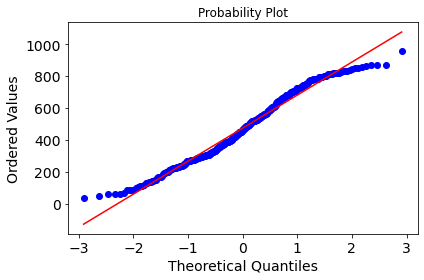

In [65]:
df_evening_spring = df_evening[df_evening['season']==2].copy()
stats.probplot(df_evening_spring['cnt'], plot=plt)
plt.ylabel('Ordered Values', fontsize=14)
plt.xlabel('Theoretical Quantiles', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
plt.ylabel('Density', fontsize=14)
plt.xlabel('Bike Hires per Day', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(fontsize=14)
plt.tight_layout()
plt.show()

## Target Variable: Count of Total Rental Bike

In [46]:
df_hour['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

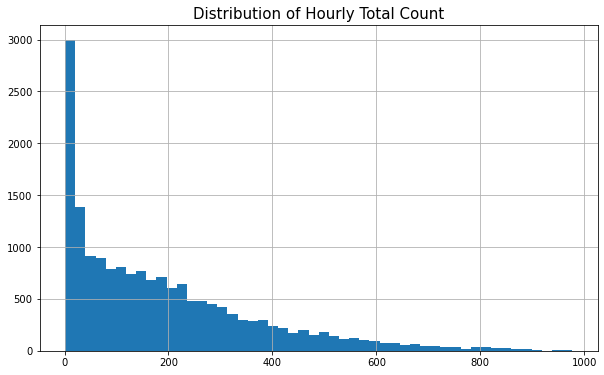

In [47]:
fig = plt.figure(figsize=(10,6))
df_hour['cnt'].hist(bins=50)
plt.title('Distribution of Hourly Total Count', fontsize=15)
plt.show()

In [48]:
df_day['cnt'].describe()

count     731.000000
mean     4504.348837
std      1937.211452
min        22.000000
25%      3152.000000
50%      4548.000000
75%      5956.000000
max      8714.000000
Name: cnt, dtype: float64

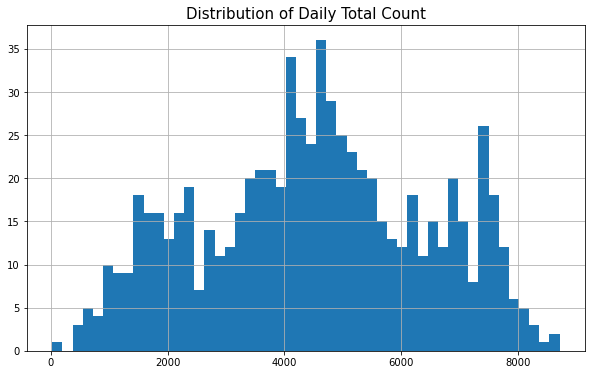

In [49]:
fig = plt.figure(figsize=(10,6))
df_day['cnt'].hist(bins=50)
plt.title('Distribution of Daily Total Count', fontsize=15)
plt.show()

## Seasonality: Spring vs Summer

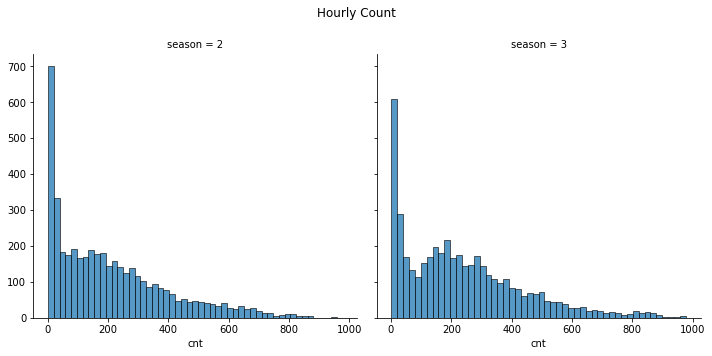

In [50]:
g = sns.FacetGrid(df_hour[df_hour['season'].isin([2,3])], col='season', height=5)
g.map(sns.histplot, 'cnt', bins=50)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Hourly Count')
plt.show()

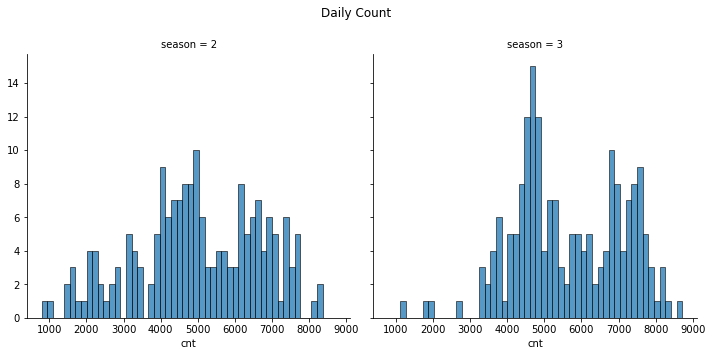

In [51]:
g = sns.FacetGrid(df_day[df_day['season'].isin([2,3])], col='season', height=5)
g.map(sns.histplot, 'cnt', bins=50)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Daily Count')
plt.show()

### 1. Two-Sample t-Tests

In [52]:
df_hour_spring = df_hour[df_hour['season']==2].copy()
df_hour_summer = df_hour[df_hour['season']==3].copy()

print(f"The mean hourly count in spring is: {round(df_hour_spring['cnt'].mean(),4)}")
print(f"The mean hourly count in summer is: {round(df_hour_summer['cnt'].mean(),4)}")

The mean hourly count in spring is: 208.3441
The mean hourly count in summer is: 236.0162


In [53]:
t_stat, p_value = stats.ttest_ind(df_hour_spring['cnt'], df_hour_summer['cnt'], equal_var=False)
print(f'The p-value for a single sided test is {p_value/2}.')

The p-value for a single sided test is 7.180530031812287e-12.


In [54]:
df_day_spring = df_day[df_day['season']==2].copy()
df_day_summer = df_day[df_day['season']==3].copy()

print(f"The mean daily count in spring is: {round(df_day_spring['cnt'].mean(),4)}")
print(f"The mean daily count in summer is: {round(df_day_summer['cnt'].mean(),4)}")

The mean daily count in spring is: 4992.3315
The mean daily count in summer is: 5644.3032


In [55]:
t_stat, p_value = stats.ttest_ind(df_day_spring['cnt'], df_day_summer['cnt'], equal_var=False)
print(f'The p-value for a single sided test is {p_value/2}.')

The p-value for a single sided test is 4.3375367590507984e-05.


## Times of the Day

In [32]:
evening_hours = [16,17,18,19]
df_evening = df_hour[df_hour['hr'].isin(evening_hours)].copy()

C:\Users\ryanl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ryanl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


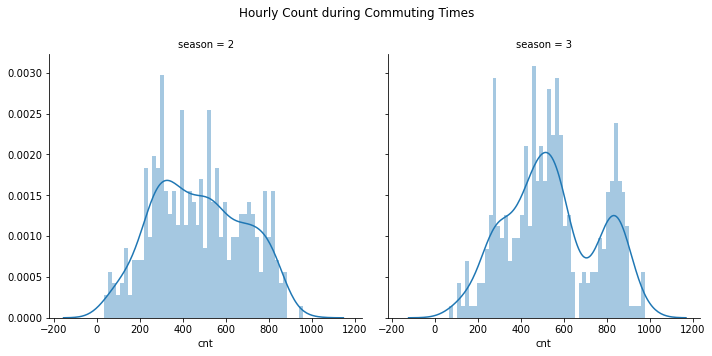

In [40]:
g = sns.FacetGrid(df_evening[df_evening['season'].isin([2,3])], col='season', height=5)
g.map(sns.distplot, 'cnt', bins=50)
g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Hourly Count during Commuting Times')
plt.show()

## Q-Q Plots for Normality Test

In [37]:
evening_hours = [16,17,18]
df_evening = df_hour[df_hour['hr'].isin(evening_hours)].copy()
df_evening = df_evening[df_evening['workingday']==1].copy()

df_evening_spring = df_evening[df_evening['season']==2].copy()
df_evening_summer = df_evening[df_evening['season']==3].copy()

C:\Users\ryanl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


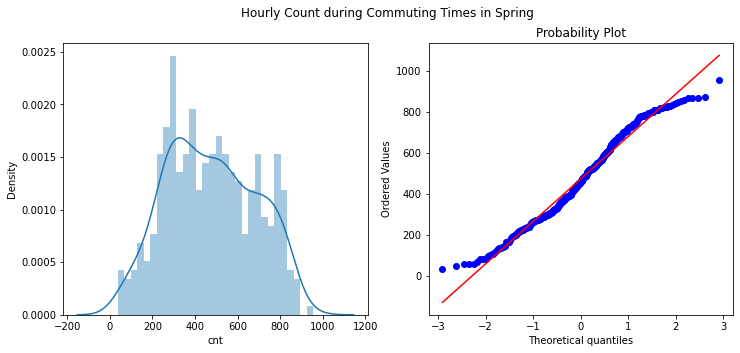

In [38]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
sns.distplot(df_evening_spring['cnt'], bins=30)
plt.subplot(1, 2, 2)
res = stats.probplot(df_evening_spring['cnt'], plot=plt)
fig.suptitle('Hourly Count during Commuting Times in Spring')
plt.show()

C:\Users\ryanl\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


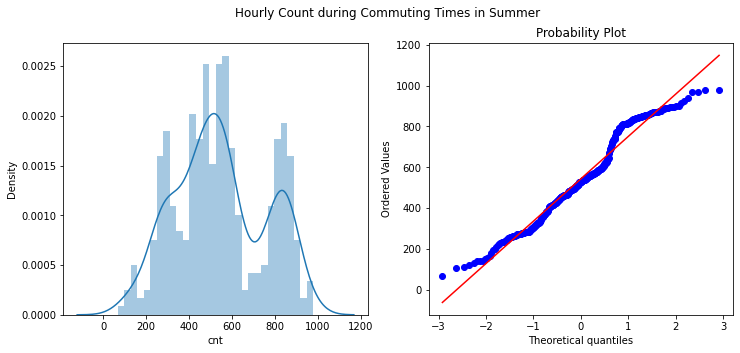

In [39]:
fig = plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(df_evening_summer['cnt'], bins=30)
plt.subplot(1,2,2)
res = stats.probplot(df_evening_summer['cnt'], plot=plt)
fig.suptitle('Hourly Count during Commuting Times in Summer')
plt.show()

## Heatmaps

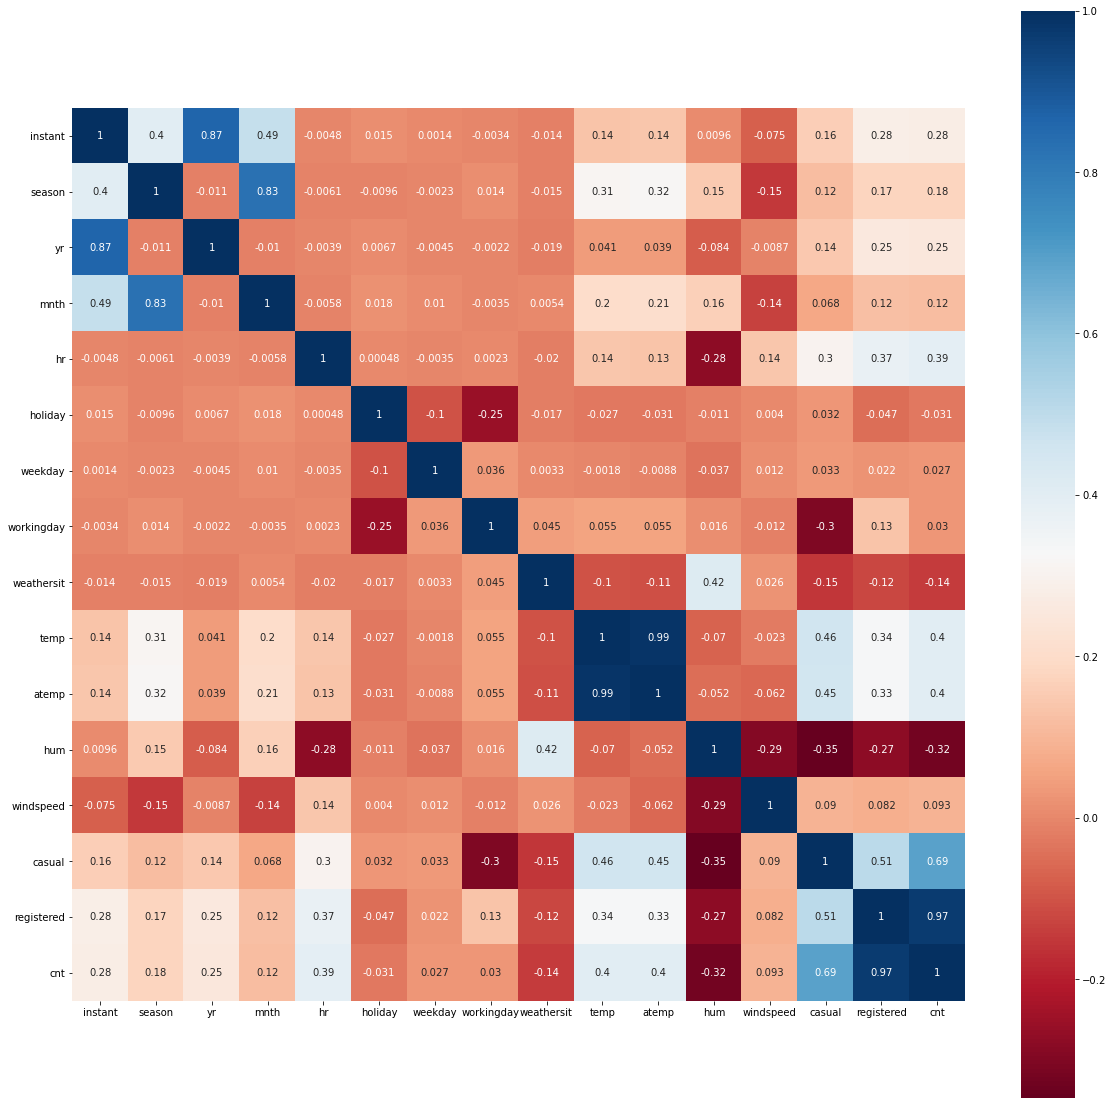

In [34]:
corr = df_hour.corr()
fig, ax = plt.subplots(figsize=(20,20))        
sns.heatmap(corr, cmap = "RdBu", square=True, annot=True, ax=ax)
plt.show()

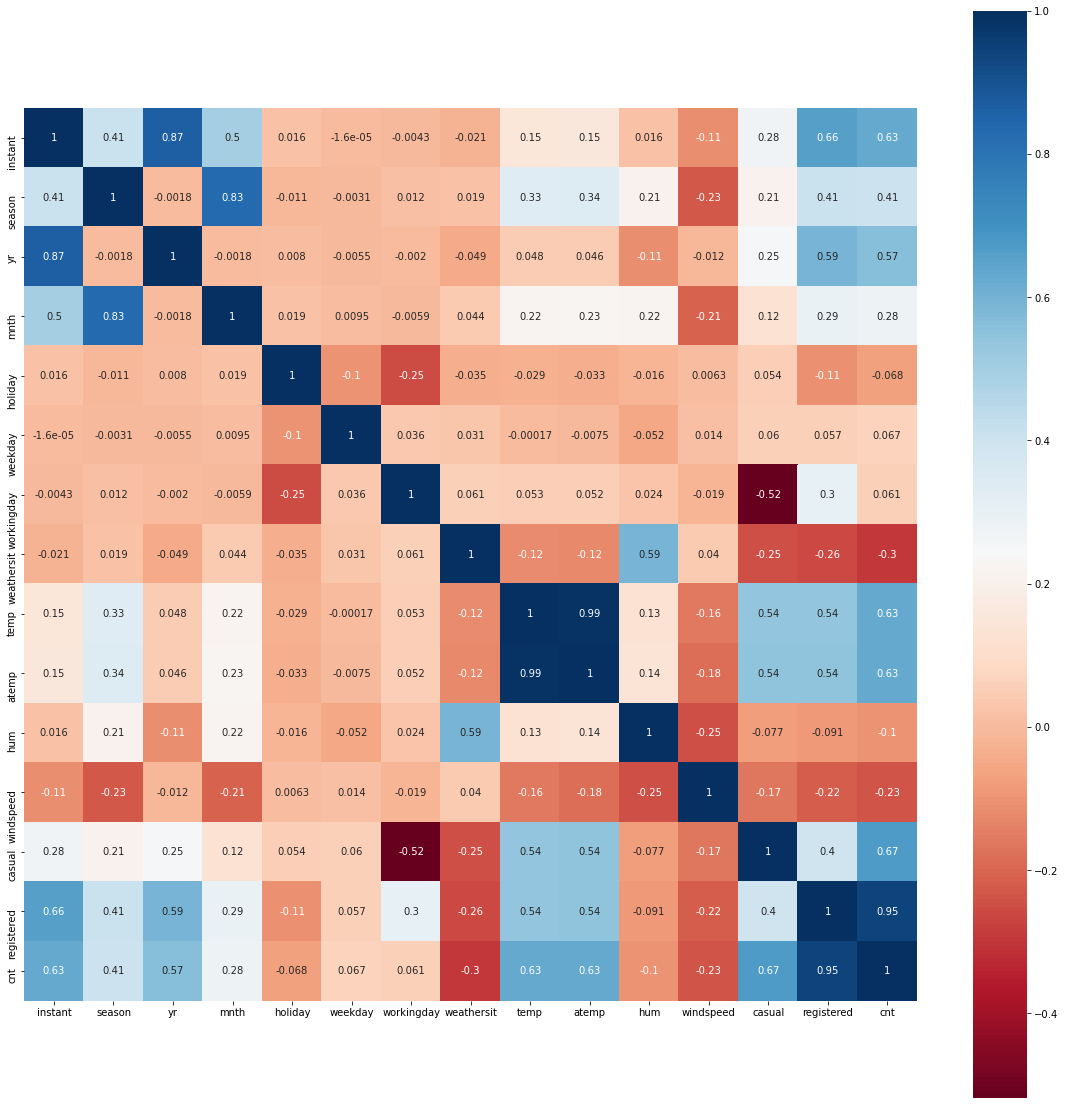

In [36]:
#heat map for correlations checking
corr = df_day.corr()
fig, ax = plt.subplots(figsize=(20,20))        
sns.heatmap(corr, cmap = "RdBu", square=True, annot=True, ax=ax)
plt.show()